<h1><b>GROCERY SHOPPING CART ANAYLSIS</h1>
<h4>By : <br>Gauransh Arora(18BIT0393) And Ayushi Gupta(18BIT0367)</h4>

# Importing Dependencies

In [ ]:
!pip install mlxtend --upgrade
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import csv
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

In [ ]:
!pip install squarify
import squarify

# Loading Data

In [ ]:
grocery_items = set()
with open("grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        grocery_items.update(line)

output_list = list()
with open("grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        row_val = {item:0 for item in grocery_items}
        row_val.update({item:1 for item in line})
        output_list.append(row_val)
grocery = pd.DataFrame(output_list)

grocery.head()

,chicken,vinegar,abrasive cleaner,light bulbs,onions,brown bread,liqueur,mayonnaise,frankfurter,frozen fish,brandy,curd cheese,dishes,beverages,sauces,whipped/sour cream,bottled beer,ham,curd,pasta,soda,hygiene articles,napkins,cleaner,syrup,rolls/buns,toilet cleaner,pet care,baking powder,hard cheese,frozen chicken,organic products,rice,zwieback,spices,long life bakery product,cereals,jam,pudding powder,meat,...,house keeping products,cream,misc. beverages,butter,dish cleaner,UHT-milk,prosecco,nuts/prunes,hair spray,flour,popcorn,red/blush wine,ketchup,rum,specialty vegetables,white bread,potato products,ice cream,newspapers,citrus fruit,preservation products,butter milk,kitchen utensil,salt,cocoa drinks,artif. sweetener,sparkling wine,domestic eggs,packaged fruit/vegetables,tea,chocolate marshmallow,sugar,hamburger meat,bags,dental care,organic sausage,fruit/vegetable juice,photo/film,beef,pork
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
grocery.columns.tolist()

['chicken',
 'vinegar',
 'abrasive cleaner',
 'light bulbs',
 'onions',
 'brown bread',
 'liqueur',
 'mayonnaise',
 'frankfurter',
 'frozen fish',
 'brandy',
 'curd cheese',
 'dishes',
 'beverages',
 'sauces',
 'whipped/sour cream',
 'bottled beer',
 'ham',
 'curd',
 'pasta',
 'soda',
 'hygiene articles',
 'napkins',
 'cleaner',
 'syrup',
 'rolls/buns',
 'toilet cleaner',
 'pet care',
 'baking powder',
 'hard cheese',
 'frozen chicken',
 'organic products',
 'rice',
 'zwieback',
 'spices',
 'long life bakery product',
 'cereals',
 'jam',
 'pudding powder',
 'meat',
 'baby cosmetics',
 'sausage',
 'bottled water',
 'detergent',
 'specialty bar',
 'kitchen towels',
 'cream cheese ',
 'frozen dessert',
 'sweet spreads',
 'pip fruit',
 'baby food',
 'frozen meals',
 'dog food',
 'white wine',
 'other vegetables',
 'cling film/bags',
 'whole milk',
 'specialty chocolate',
 'cat food',
 'make up remover',
 'liquor',
 'soups',
 'sound storage medium',
 'snack products',
 'pastry',
 'coffee',


# View Top Sold items

In [ ]:
total_item_count = sum(grocery.sum())
print("Total Item : ", total_item_count)
print()
item_summary = grocery.sum().sort_values(ascending = False).reset_index()
item_summary.rename(columns={item_summary.columns[0]:'item_name',item_summary.columns[1]:'item_count'}, inplace=True)
print("Item Summary:")
print(item_summary.head())

Total Item :  43367

Item Summary:
          item_name  item_count
0        whole milk        2513
1  other vegetables        1903
2        rolls/buns        1809
3              soda        1715
4            yogurt        1372


# Visualize Top Sold Items

In [ ]:
y=item_summary.head(50)
y.columns

Index(['item_name', 'item_count'], dtype='object')

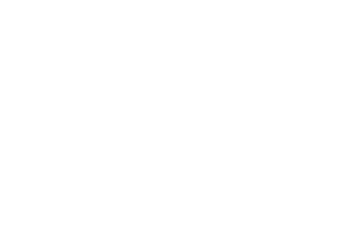

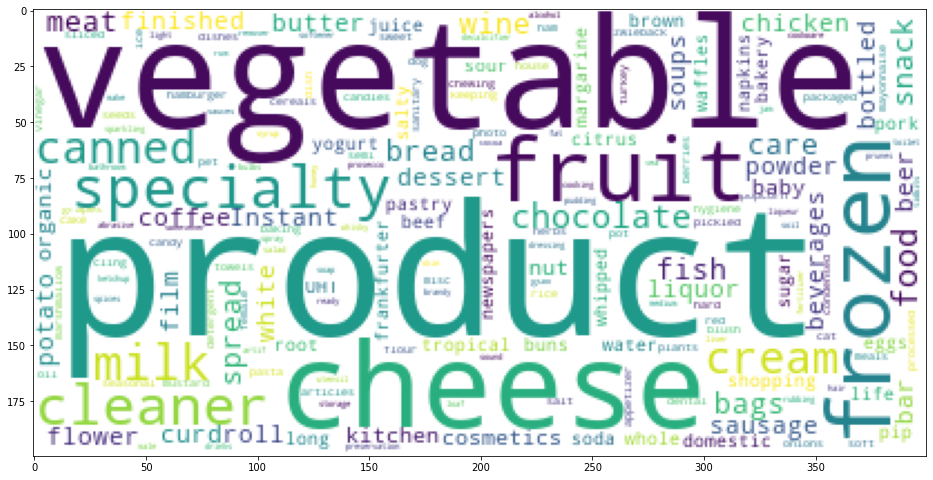

In [ ]:
x=item_summary
from wordcloud import WordCloud

text = ' '.join(text for text in x.item_name.astype(str))
wc = WordCloud(background_color="white")
wordcloud = wc.generate(text)

# Display wordcloud
plt.axis('off')
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud)
plt.show()

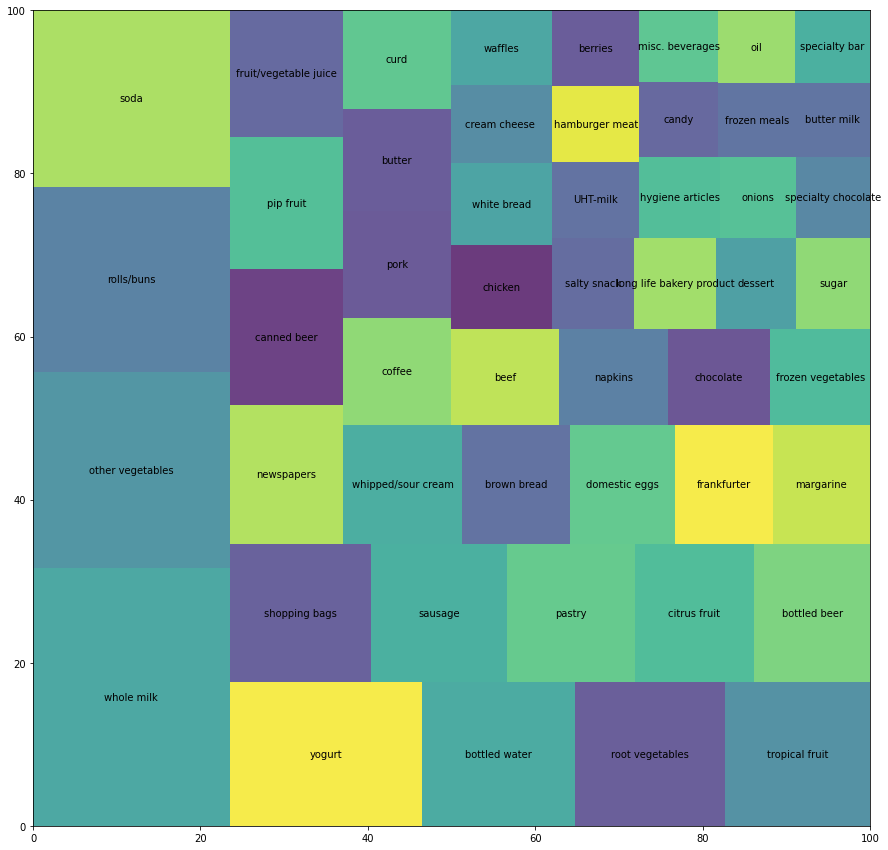

In [ ]:
plt.rcParams['figure.figsize'] = (15, 15)
squarify.plot(sizes = y.item_count, label = y.item_name, alpha=0.8)

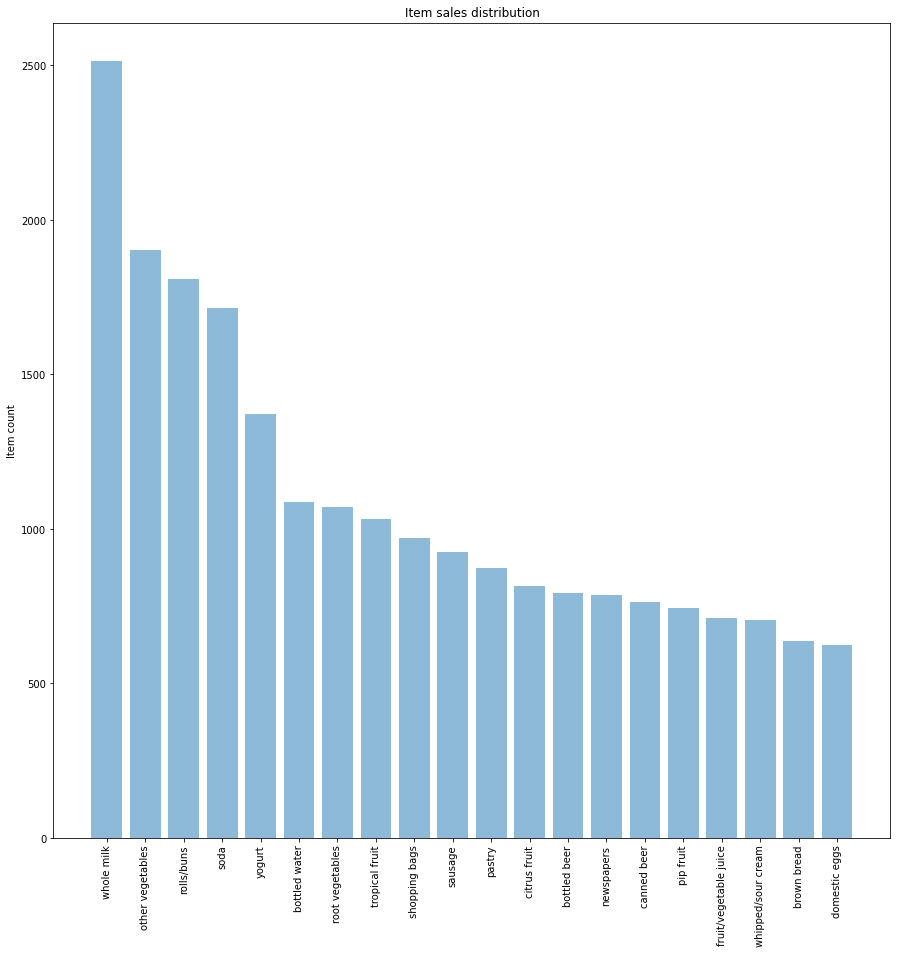

In [ ]:
objects = (list(item_summary['item_name'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(item_summary['item_count'].head(n=20))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')
plt.show()

<h1><b> APPLYING APRIORI ALGORITHM</H1>

<h2><u>FOR MIN SUPPORT 3% </h2>



# Generating frequent itemsets

In [ ]:
frequent_itemsets = apriori(grocery, min_support=0.03, use_colnames=True)
print(frequent_itemsets)

     support                       itemsets
0   0.042908                      (chicken)
1   0.031012                       (onions)
2   0.064870                  (brown bread)
3   0.058973                  (frankfurter)
4   0.071683           (whipped/sour cream)
..       ...                            ...
58  0.033249           (whole milk, pastry)
59  0.042298   (whole milk, tropical fruit)
60  0.048907  (whole milk, root vegetables)
61  0.056024           (whole milk, yogurt)
62  0.030503     (whole milk, citrus fruit)

[63 rows x 2 columns]


# Generating rules

In [ ]:
my_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [ ]:
#viewing top 100 rules
my_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(whipped/sour cream),0.255516,0.071683,0.032232,0.126144,1.759754,0.013916,1.062323
1,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
2,(rolls/buns),(soda),0.183935,0.174377,0.038332,0.208402,1.195124,0.006258,1.042983
3,(soda),(rolls/buns),0.174377,0.183935,0.038332,0.219825,1.195124,0.006258,1.046003
4,(rolls/buns),(sausage),0.183935,0.093950,0.030605,0.166390,1.771048,0.013324,1.086899
5,(sausage),(rolls/buns),0.093950,0.183935,0.030605,0.325758,1.771048,0.013324,1.210344
6,(rolls/buns),(other vegetables),0.183935,0.193493,0.042603,0.231620,1.197047,0.007013,1.049620
7,(other vegetables),(rolls/buns),0.193493,0.183935,0.042603,0.220179,1.197047,0.007013,1.046477
8,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
9,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696


<h2><u>FOR MIN SUPPORT 5%</h2>

In [ ]:
frequent_itemsets = apriori(grocery, min_support=0.05, use_colnames=True)
print(frequent_itemsets)
my_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
my_rules

     support                        itemsets
0   0.064870                   (brown bread)
1   0.058973                   (frankfurter)
2   0.071683            (whipped/sour cream)
3   0.080529                  (bottled beer)
4   0.053279                          (curd)
5   0.174377                          (soda)
6   0.052364                       (napkins)
7   0.183935                    (rolls/buns)
8   0.093950                       (sausage)
9   0.110524                 (bottled water)
10  0.075648                     (pip fruit)
11  0.193493              (other vegetables)
12  0.255516                    (whole milk)
13  0.088968                        (pastry)
14  0.058058                        (coffee)
15  0.077682                   (canned beer)
16  0.104931                (tropical fruit)
17  0.098526                 (shopping bags)
18  0.058566                     (margarine)
19  0.108998               (root vegetables)
20  0.139502                        (yogurt)
21  0.0554

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
1,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
2,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
3,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132


<h1><b>APPLYING FP GROWTH ALGORITHM</h1>

<h2><u>FOR MIN SUPPORT 3%</h2>

# Generating frequent itemsets

In [ ]:
frequent_itemsets = fpgrowth(grocery, min_support=0.03, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
...,...,...
58,0.033249,"(whole milk, pastry)"
59,0.047382,"(other vegetables, root vegetables)"
60,0.048907,"(whole milk, root vegetables)"
61,0.030605,"(rolls/buns, sausage)"


# Generating rules

In [ ]:
my_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
my_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(citrus fruit),0.255516,0.082766,0.030503,0.119379,1.442377,0.009355,1.041577
1,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008
2,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
3,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
4,(rolls/buns),(yogurt),0.183935,0.139502,0.034367,0.186844,1.339363,0.008708,1.058220
5,(yogurt),(rolls/buns),0.139502,0.183935,0.034367,0.246356,1.339363,0.008708,1.082825
6,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436
7,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
8,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796
9,(other vegetables),(tropical fruit),0.193493,0.104931,0.035892,0.185497,1.767790,0.015589,1.098913


<h2><u>FOR MIN SUPPORT 5%</h2>

In [ ]:
frequent_itemsets = fpgrowth(grocery, min_support=0.05, use_colnames=True)
print(frequent_itemsets)
my_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
my_rules

     support                        itemsets
0   0.082766                  (citrus fruit)
1   0.058566                     (margarine)
2   0.139502                        (yogurt)
3   0.104931                (tropical fruit)
4   0.058058                        (coffee)
5   0.255516                    (whole milk)
6   0.075648                     (pip fruit)
7   0.193493              (other vegetables)
8   0.055414                        (butter)
9   0.183935                    (rolls/buns)
10  0.080529                  (bottled beer)
11  0.110524                 (bottled water)
12  0.053279                          (curd)
13  0.052466                          (beef)
14  0.174377                          (soda)
15  0.058973                   (frankfurter)
16  0.079817                    (newspapers)
17  0.072293         (fruit/vegetable juice)
18  0.088968                        (pastry)
19  0.108998               (root vegetables)
20  0.077682                   (canned beer)
21  0.0939

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
1,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
2,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
3,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
4,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
5,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696


<h1><B><U>ANALYSING TIME FOR BOTH ALGO FOR MIN SUPPORT : 3, 4 AND 5%</H1>

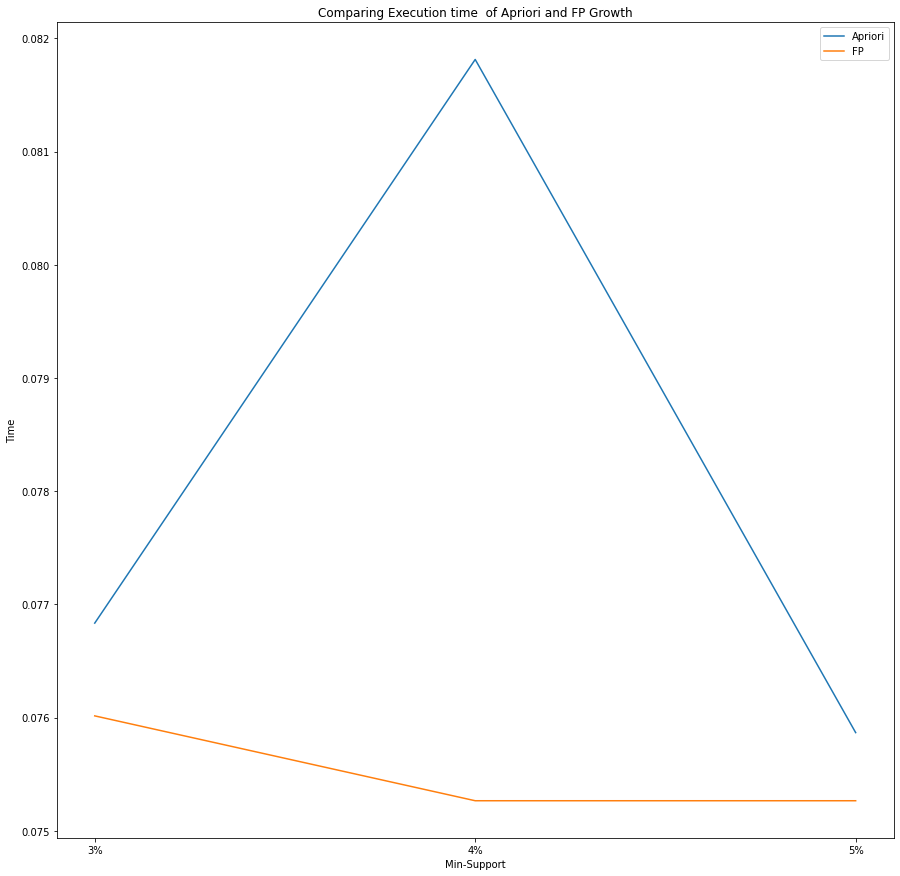

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.lineplot(["3%","4%","5%"],[np.mean(chk_1_res[0]),np.mean(chk_2_res[0]),np.mean(chk_3_res[0])], label="Apriori")
sns.lineplot(["3%","4%","5%"],[np.mean(chk_1_res[1]),np.mean(chk_2_res[1]),np.mean(chk_2_res[1])], label="FP")
plt.title("Comparing Execution time  of Apriori and FP Growth")
plt.xlabel("Min-Support")
plt.ylabel("Time")
plt.show()